# MPG Dataset (Miles Per Gallon)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('mpg')
df = df.dropna()

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 1. Quelles sont les variables discrètes et continues de ce dataset ?
 - Discrète : cylinders, horsepower, model_year, origin, name
 - Continue : mpg, displacement, weight, acceleration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [7]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model_year       13
origin            3
name            301
dtype: int64

## 2. Analysez la variable mpg.

- Tous les modèles de voitures du jeu de données, datant de 1972 à 1982, consomment en moyenne 23.5 gallons pour 100 milles.
- Ecart-type égal à 7.8 -> La dispersion du jeu de données n'est pas négligeable !
- Le modèle le plus performant en termes de consommation a 9 mpg. Quel est ce modèle ? Quel est son origin ?
- Le modèle le plus gourmand en termes de consommation a 46 mpg. Quel est ce modèle ? Quel est son origin ?
- La mediane est très proche de la moyenne. La distribution du jeu de données est probablement symétrique

In [9]:
df['mpg'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

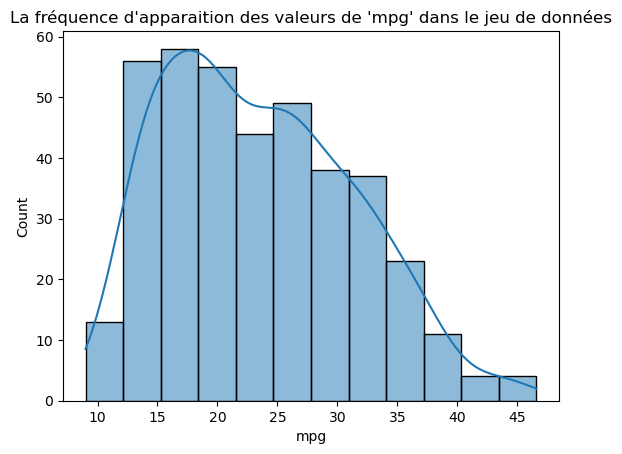

In [10]:
sns.histplot(data=df, x='mpg', kde=True)
plt.title("La fréquence d'apparaition des valeurs de 'mpg' dans le jeu de données")
plt.show()

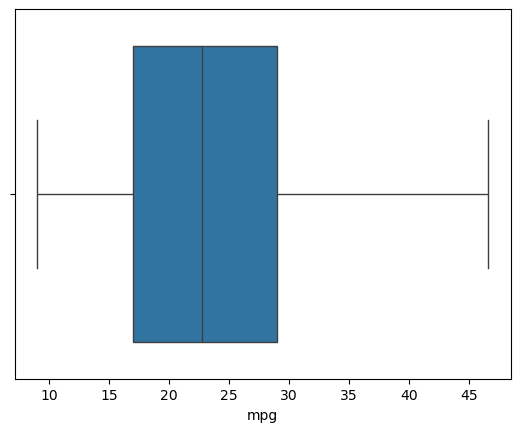

In [11]:
sns.boxplot(data=df, x='mpg')
plt.show()

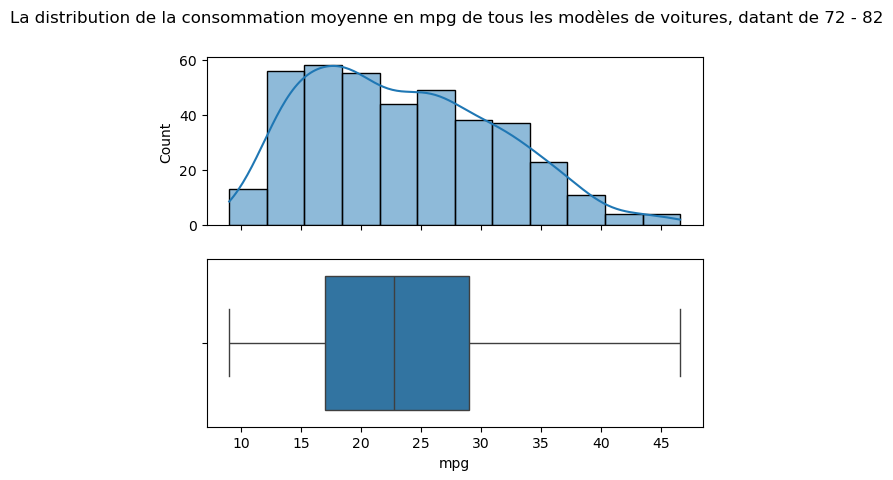

In [12]:
fig, ax = plt.subplots(2, 1, sharex=True)
plt.suptitle("La distribution de la consommation moyenne en mpg de tous les modèles de voitures, datant de 72 - 82")
sns.histplot(data=df, x='mpg', kde=True, ax=ax[0])
sns.boxplot(data=df, x='mpg', ax=ax[1])
plt.show()

## 3. Analysez la variable "cylinders"
 - Plus de 50% de modèles de voitures ont 4 cylindres. Est-ce la meilleure configuration ?
 - Plus de 99% de modèles de voitures ont un nombre de cylindres pair (4, 6 ou 8). Les modèles avec 3 et 5 cylindres sont-ils gourmands en consommation ?

In [14]:
df['cylinders'].value_counts(normalize=True).round(2).sort_index()

cylinders
3    0.01
4    0.51
5    0.01
6    0.21
8    0.26
Name: proportion, dtype: float64

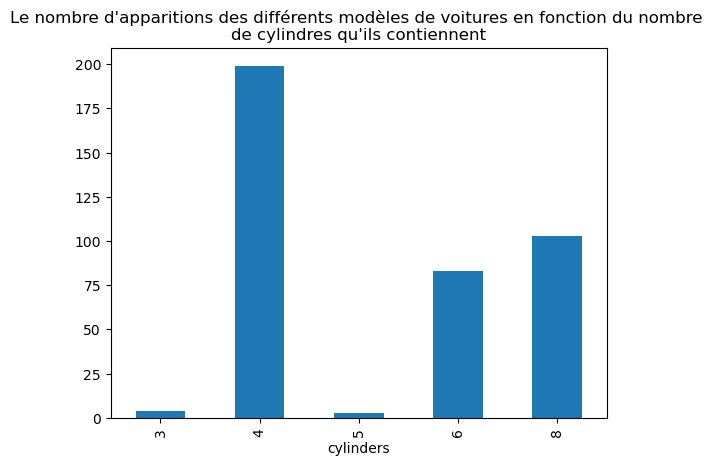

In [15]:
df['cylinders'].value_counts().sort_index().plot.bar()
plt.title("Le nombre d'apparitions des différents modèles de voitures en fonction du nombre \nde cylindres qu'ils contiennent" )
plt.show()

## 4. Analysez la variable "origin"
 - Plus de 60% de modèles de voitures présent dans le jeu de données sont fabriqués aux États-Unis.

In [17]:
df['origin'].value_counts(normalize=True).round(2)

origin
usa       0.62
japan     0.20
europe    0.17
Name: proportion, dtype: float64

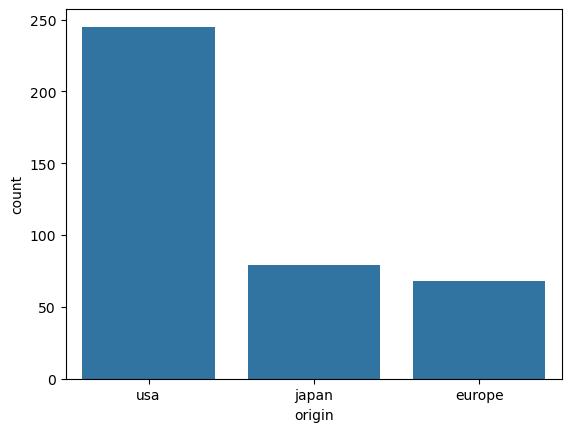

In [18]:
sns.countplot(data=df, x='origin')
plt.show()

## 5. Observez l'évolution de la consommation des voitures (mpg) par rapport au nombre de chevaux (horsepower) 
 - La distance parcouru en milles par les véhicules par unité de gallon le mpg dimunue avec l'augmentation des la puissance 

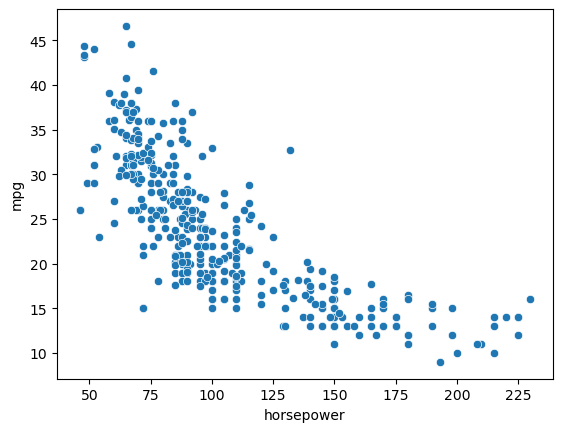

In [50]:
sns.scatterplot(data=df, x='horsepower', y='mpg')
plt.show()

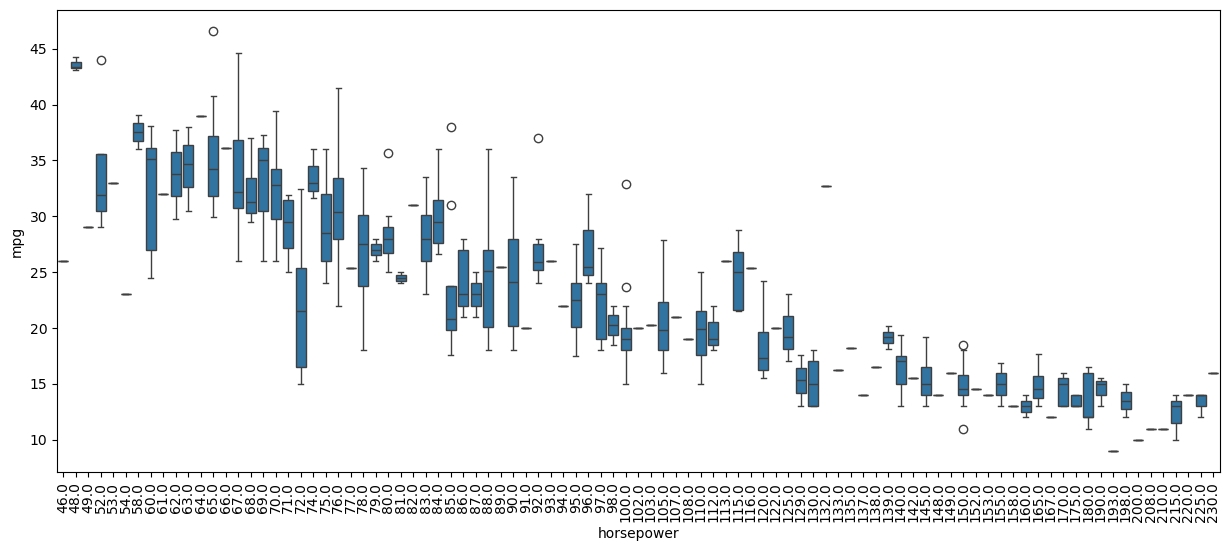

In [48]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='horsepower', y='mpg')
plt.xticks(rotation=90)
plt.show()